<a href="https://colab.research.google.com/github/rojinebrahimi/fastai-vision/blob/master/facial-expression-recognition/facial_expression_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Environment Preparation**

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root = '/content/gdrive/My Drive'
base_dir = root + 'fastai-v3'

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = Path('/facial-expressions')
path.mkdir(parents=True, exist_ok=True)

In [0]:
path

PosixPath('/facial-expressions')

CK+48 is a facial expression dataset you can find at: https://www.kaggle.com/shawon10/ckplus/download

In [8]:
!unzip -o ckplus.zip

Archive:  ckplus.zip
  inflating: CK+48/anger/S010_004_00000017.png  
  inflating: CK+48/anger/S010_004_00000018.png  
  inflating: CK+48/anger/S010_004_00000019.png  
  inflating: CK+48/anger/S011_004_00000019.png  
  inflating: CK+48/anger/S011_004_00000020.png  
  inflating: CK+48/anger/S011_004_00000021.png  
  inflating: CK+48/anger/S014_003_00000028.png  
  inflating: CK+48/anger/S014_003_00000029.png  
  inflating: CK+48/anger/S014_003_00000030.png  
  inflating: CK+48/anger/S022_005_00000030.png  
  inflating: CK+48/anger/S022_005_00000031.png  
  inflating: CK+48/anger/S022_005_00000032.png  
  inflating: CK+48/anger/S026_003_00000013.png  
  inflating: CK+48/anger/S026_003_00000014.png  
  inflating: CK+48/anger/S026_003_00000015.png  
  inflating: CK+48/anger/S028_001_00000022.png  
  inflating: CK+48/anger/S028_001_00000023.png  
  inflating: CK+48/anger/S028_001_00000024.png  
  inflating: CK+48/anger/S029_001_00000017.png  
  inflating: CK+48/anger/S029_001_00000018.png  

In [0]:
!mv ck/ '/facial-expressions/'

In [17]:
path = '/content/CK+48'
path

'/content/CK+48'

# **Creating DataBunch**

In [0]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2, bs=32).normalize(imagenet_stats)

In [0]:
data.c

7

In [0]:
data.classes

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']

In [0]:
len(data.train_ds)

785

In [0]:
len(data.valid_ds)

196

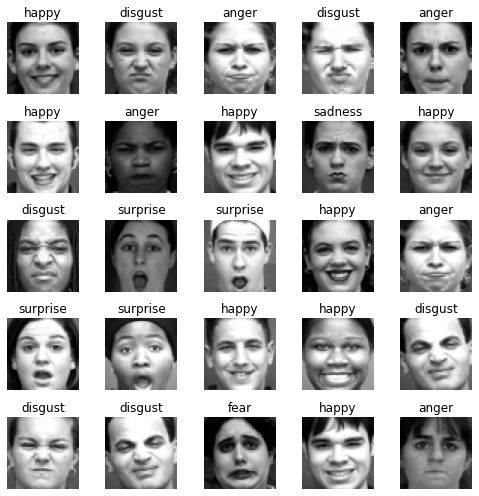

In [20]:
data.show_batch(row=4, figsize=(7, 7))

# **Training the data**

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate])

In [62]:
learn.fit_one_cycle(7)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.719627,1.863661,0.362245,0.637755,00:01
1,1.828580,1.034957,0.647959,0.352041,00:01
2,1.347341,0.494400,0.821429,0.178571,00:01
3,1.047586,0.364907,0.877551,0.122449,00:01
4,0.821501,0.236273,0.918367,0.081633,00:01
5,0.645478,0.188266,0.943878,0.056122,00:01
6,0.557490,0.184269,0.954082,0.045918,00:01


In [0]:
learn.save('stage-1')

In [64]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (785 items)
x: ImageList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: CategoryList
anger,anger,anger,anger,anger
Path: /content/CK+48;

Valid: LabelList (196 items)
x: ImageList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: CategoryList
anger,surprise,surprise,contempt,disgust
Path: /content/CK+48;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

unfreeze the Learner Object to train the whole model and find the best learning rate

In [65]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


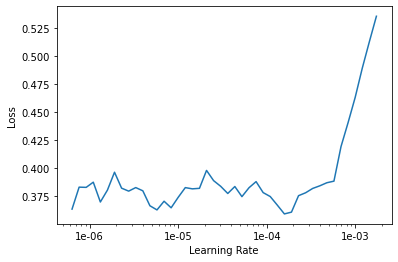

In [66]:
learn.recorder.plot()

In [68]:
learn.load('stage-1')
learn.fit_one_cycle(7, max_lr=5e-05)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.332529,0.157760,0.948980,0.051020,00:01
1,0.306660,0.151440,0.959184,0.040816,00:01
2,0.282388,0.157563,0.959184,0.040816,00:01
3,0.230007,0.086434,0.974490,0.025510,00:01
4,0.196577,0.077043,0.979592,0.020408,00:01
5,0.149542,0.077491,0.979592,0.020408,00:01
6,0.122755,0.079752,0.979592,0.020408,00:01


In [0]:
learn.save('stage-2')

In [70]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (785 items)
x: ImageList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: CategoryList
anger,anger,anger,anger,anger
Path: /content/CK+48;

Valid: LabelList (196 items)
x: ImageList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: CategoryList
anger,surprise,surprise,contempt,disgust
Path: /content/CK+48;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

In [71]:
interpt = ClassificationInterpretation.from_learner(learn)

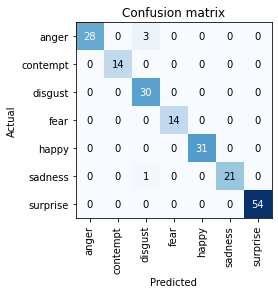

In [73]:
interpt.plot_confusion_matrix()

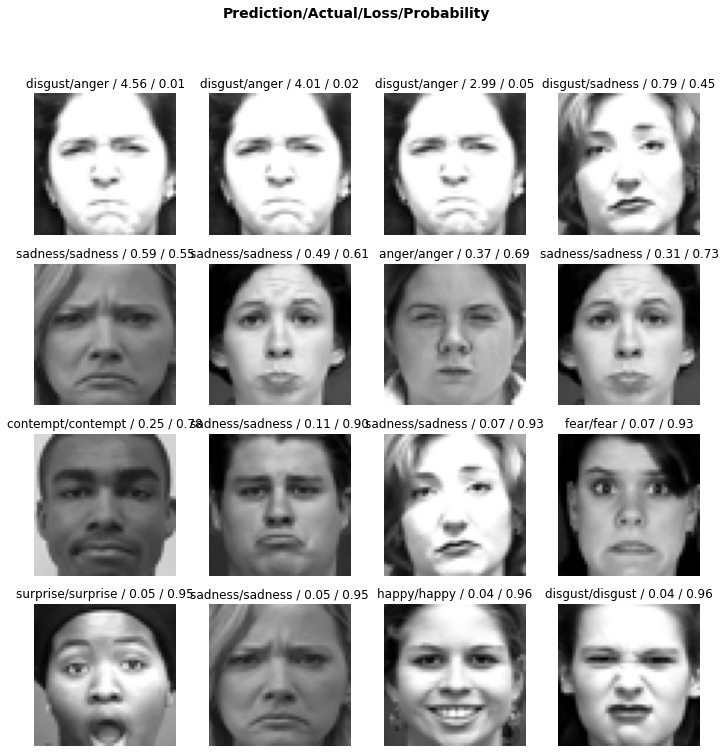

In [85]:
interpt.plot_top_losses(16)

In [86]:
interpt.most_confused(min_val=2)

[('anger', 'disgust', 3)]

In [0]:
learn.export()

## **Prediction**

choose the image to predict(provide the path)

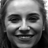

In [91]:
image_to_pred = open_image('/content/CK+48/happy/S014_005_00000017.png')
image_to_pred

load the exported learner object

In [101]:
load_learner('/content/CK+48/')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/CK+48;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/CK+48;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
     

In [0]:
preds, true_y, indx = learn.predict(image_to_pred)

In [106]:
preds

Category happy

In [107]:
true_y

tensor(4)

In [108]:
indx

tensor([1.5299e-08, 1.0524e-09, 5.8010e-09, 4.3890e-08, 1.0000e+00, 2.2618e-10,
        7.6080e-13])